# E3. Í≥†ÏñëÏù¥ ÏàòÏóº Ïä§Ìã∞Ïª§ ÎßåÎì§Í∏∞

## Step 1. Ïä§Ìã∞Ïª§ Íµ¨ÌïòÍ∏∞ or ÎßåÎì§Í∏∞
- [Í≥†ÏñëÏù¥ ÏàòÏóº](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)

## Step 2. ÏñºÍµ¥ Í≤ÄÏ∂ú & ÎûúÎìúÎßàÌÅ¨ Í≤ÄÏ∂úÌïòÍ∏∞

In [23]:
# ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

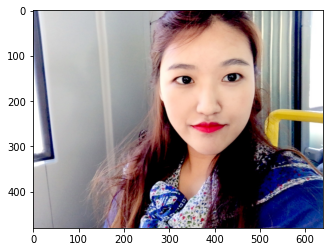

In [25]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/jiyoon.png'

# OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄ ÏùΩÏñ¥Ïò§Í∏∞
img_bgr = cv2.imread(my_image_path)
# 640 * 480 ÌÅ¨Í∏∞Î°ú Î¶¨ÏÇ¨Ïù¥Ï¶à
img_bgr = cv2.resize(img_bgr, (640, 480))
img_show = img_bgr.copy()
# BGR -> RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(img_rgb)
plt.show()

In [26]:
# HOG(Histogram of Oriented Gradients) - Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏñºÍµ¥ Ï∞æÍ∏∞
import dlib
# detector ÏÑ†Ïñ∏
detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

üå´üõ∏


In [27]:
# detector Ïù¥Ïö©Ìï¥ ÏñºÍµ¥Ïùò bounding box Ï∂îÏ∂ú
#(image, number of image pyramid)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(266, 93) (489, 316)]]


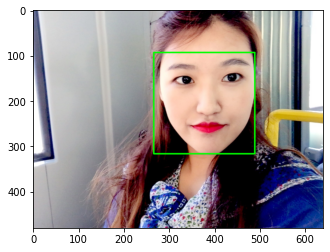

In [28]:
# Ï∞æÏùÄ ÏñºÍµ¥ÏùÑ ÌôîÎ©¥Ïóê Ï∂úÎ†•

# Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Dlib landmark localization
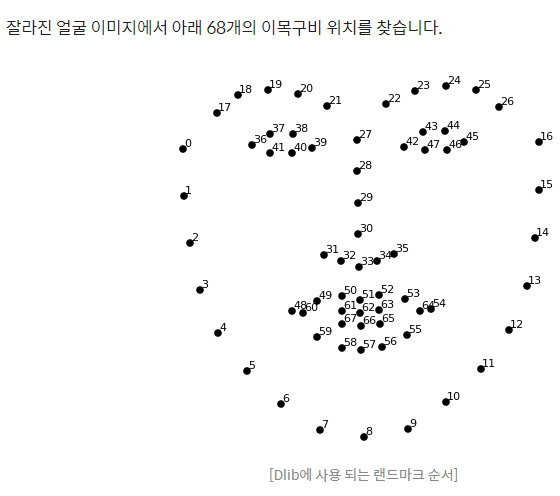

In [29]:
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [30]:
list_landmarks = []
for dlib_rect in dlib_rects:
    # landmark_predictorÎäî RGB Ïù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÏùÑ ÏûÖÎ†• Î∞õÏïÑ dlib.full_object detection Î∞òÌôò
    points = landmark_predictor(img_rgb, dlib_rect)
    # pointsÎäî dlib.full_object_detectionÏùò Í∞ù„Öä
    # parts() Ìï®ÏàòÎ°ú Í∞úÎ≥Ñ ÏúÑÏπòÏóê Ï†ëÍ∑º
    # ÏßÅÍ¥ÄÏ†ÅÏù∏ (x,y) ÌòïÌÉúÎ°ú Ï†ëÍ∑ºÌï† Ïàò ÏûàÎèÑÎ°ù Î≥ÄÌôò
    # list_landmarkÏóê 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Í∞Ä ÏñºÍµ¥ Í∞úÏàòÎßåÌÅº Ï†ÄÏû•Îê®
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


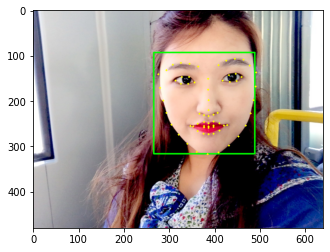

In [31]:
# ÎûúÎìúÎßàÌÅ¨ Ï∂úÎ†•
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. Ïä§Ìã∞Ïª§ Ï†ÅÏö© ÏúÑÏπò ÌôïÏù∏ÌïòÍ∏∞
![image-2.png](attachment:image-2.png)
- Í≥†ÏñëÏù¥ ÏàòÏóºÏù¥ Ï†ÅÏö©Îê† Î≥º ÏúÑÏπòÎ•º lank ÏÇ¨Ïö©Ìï¥ÏÑú Í≥ÑÏÇ∞
 2, 36, 48, 30Î≤à Ïù∏Îç±Ïä§ ÏÇ¨Ïö©

In [32]:
# Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # ÏΩî ÎÅù ÏßÄÏ†ê index: 
    print(landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y):(%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(387, 220)
(x,y):(387,220)
(w,h):(224,224)


## Step 4. Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞

(224, 224, 3)


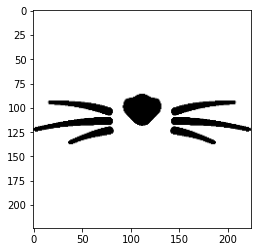

In [33]:
# Í≥†ÏñëÏù¥ ÏàòÏóº Ïä§Ìã∞Ïª§ Î¶¨ÏÇ¨Ïù¥Ï¶à
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print(img_sticker.shape)
plt.imshow(img_sticker)

### Í∞ÄÏ§ëÏπò Ìï©, ÌèâÍ∑† Ïó∞ÏÇ∞ - cv2.addWeighted
- [Ï∞∏Í≥†]: https://deep-learning-study.tistory.com/115
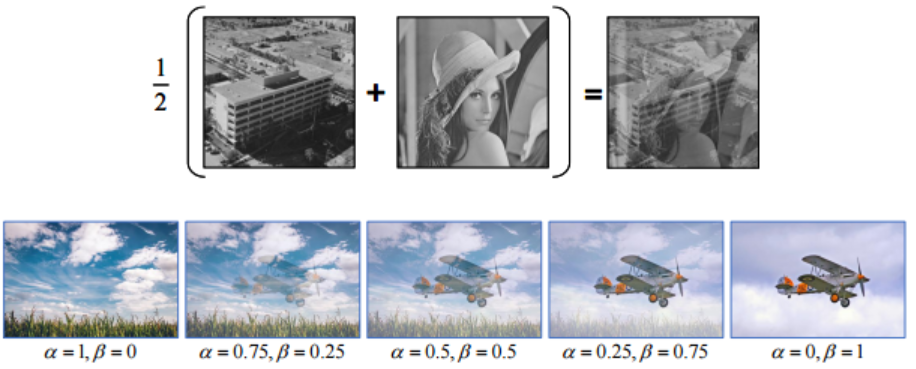


```python

cv2.addWeighted(src1, alpha, src2, beta, gamma, dst = None, dtype = None)

```
- src1: (ÏûÖÎ†•) Ï≤´ Î≤àÏß∏ ÏòÅÏÉÅ
- alpha: Ï≤´ Î≤àÏß∏ ÏòÅÏÉÅ Í∞ÄÏ§ëÏπò
- src2: 2Î≤àÏß∏ ÏòÅÏÉÅ. src1ÏôÄ Í∞ôÏùÄ ÌÅ¨Í∏∞ & Í∞ôÏùÄ ÌÉÄÏûÖ
- beta: Îëê Î≤àÏß∏ ÏòÅÏÉÅ Í∞ÄÏ§ëÏπò
- gamma: Í≤∞Í≥º ÏòÅÏÉÅÏóê Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÎçîÌï† Í∞í
- dst: Í∞ÄÏ§ëÏπò Ìï© Í≤∞Í≥º ÏòÅÏÉÅ
- dtype: Ï∂úÎ†• ÏòÅÏÉÅ(dst)Ïùò ÌÉÄÏûÖ


nose x y: 387 220
left-top: 275 108
sticker size: 275 108


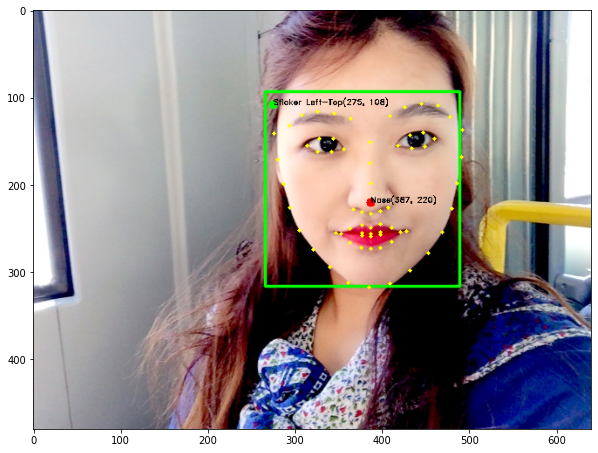

In [34]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ x,y Ï¢åÌëú Ï°∞Ï†ï
# Ïù¥ÎØ∏ÏßÄ ÏãúÏûëÏ†êÏùÄ top_left Ï¢åÌëúÏù¥Í∏∞ ÎïåÎ¨∏
# left
refined_x = x - (w//2)
# top
refined_y = y - (h//2)
# print('(x,y):(%d,%d)'%(refined_x, refined_y))

print('nose x y:', x, y)
print('left-top:', refined_x, refined_y)
print('sticker size:', refined_x, refined_y)

marked_image = img_show_rgb.copy()
cv2.circle(marked_image, (x, y), 5, (255, 0, 0), -1)
cv2.circle(marked_image, (refined_x, refined_y), 5, (0, 255, 0), -1)
cv2.putText(marked_image, f'Nose{(x, y)}', (x, y), fontScale = 0.3, color = (0,0,0),
            fontFace = cv2.FONT_HERSHEY_DUPLEX)
cv2.putText(marked_image, f'Sticker Left-Top{(refined_x, refined_y)}', (refined_x, refined_y), fontScale = 0.3, color = (0,0,0), fontFace = cv2.FONT_HERSHEY_DUPLEX)

plt.figure(figsize = (10, 10))
plt.imshow(marked_image)
plt.show()

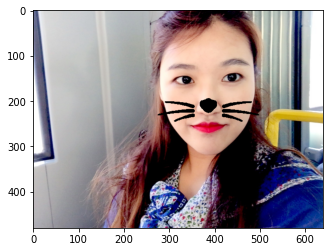

In [36]:
# Ìï¥Îãπ Ï¢åÌëúÏóê Ïä§Ìã∞Ïª§ Î∂ôÏù¥Í∏∞2
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5. Î¨∏Ï†úÏ†ê Ï∞æÏïÑÎ≥¥Í∏∞
- ÏñºÍµ¥ Í∞ÅÎèÑÏóê Îî∞Îùº Ïä§Ìã∞Ïª§Í∞Ä Ïñ¥ÎñªÍ≤å Î≥ÄÌï¥ÏïºÌïòÎäîÍ∞Ä
- Î©ÄÎ¶¨ÏÑú Ï¥¨ÏòÅ, ÌòπÏùÄ ÏòÜÏúºÎ°ú ÎàÑÏõåÏÑú Ï¥¨ÏòÅÌïòÎ©¥ ÏïàÎêòÎäî Í≤ΩÏö∞
- Ïã§Ìñâ ÏÜçÎèÑÍ∞Ä Ï§ëÏöîÌïúÏßÄ
- Ïä§Ìã∞Ïª§Ïï±ÏùÑ ÎßåÎì§ Îïå Ï†ïÌôïÎèÑÍ∞Ä ÏñºÎßàÎÇò Ï§ëÏöîÌïúÏßÄ

### ÏñºÍµ¥ Í∞ÅÎèÑÏóê Îî∞Î•∏ Ïä§Ìã∞Ïª§Ïùò Î≥ÄÌôî
- Î∞©ÌÉÑÏÜåÎÖÑÎã® ÏßÑÏùò Ï∏°Î©¥ ÏñºÍµ¥Ïù¥ Ïù∏ÏãùÎêòÎäîÏßÄ Ïó¨Î∂Ä ÌôïÏù∏

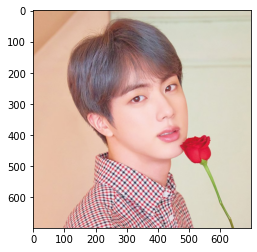

In [13]:
jin_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/Jin.png'
jin_bgr = cv2.imread(jin_image_path)
jin_show = jin_bgr.copy()
jin_rgb = cv2.cvtColor(jin_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(jin_rgb)
plt.show()

#### cv2.rectangle(img, start, end, color, thickness)
- [Ï∞∏Í≥†](https://opencv-python.readthedocs.io/en/latest/doc/03.drawShape/drawShape.html)
- img: Í∑∏Î¶ºÏùÑ Í∑∏Î¶¥ Ïù¥ÎØ∏ÏßÄ
- start: ÏãúÏûë Ï¢åÌëú(x1,y1)
- end: Ï¢ÖÎ£å Ï¢åÌëú(x2, y2)
- color: BGR ÌòïÌÉúÏùò Color(Ïòà (255, 0, 0) -> Blue)
- thickness(int): ÏÑ†Ïùò ÎëêÍªò. pixel
```python
img = cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)
```

#### cv2.circle(img, center, radian, color, thickness)
- img: Í∑∏Î¶ºÏùÑ Í∑∏Î¶¥ Ïù¥ÎØ∏ÏßÄ
- center: ÏõêÏùò Ï§ëÏã¨ Ï¢åÌëú(x, y)
- radian: Î∞òÏßÄÎ¶Ñ
- color: BGR ÌòïÌÉúÏùò Color
- thickness: ÏÑ†Ïùò ÎëêÍªò, -1Ïù¥Î©¥ Ïõê ÏïàÏ™ΩÏùÑ Ï±ÑÏõÄ

rectangles[[(260, 171) (527, 439)]]


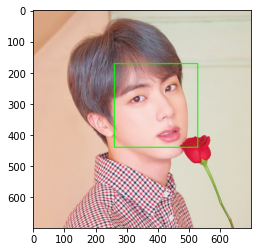

In [14]:
# detector hog ÏÑ†Ïñ∏
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(jin_rgb, 1)

# Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(jin_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)

jin_show_rgb = cv2.cvtColor(jin_show, cv2.COLOR_BGR2RGB)
plt.imshow(jin_show_rgb)
plt.show()

In [15]:
# Ï†ÑÏù¥ÌïôÏäµÎêú Î™®Îç∏ Í∞ÄÏ†∏Ïò§Í∏∞
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [16]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(jin_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(jin_show, point, 2, (0, 255, 255), -1)
        
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y):(%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(x,y):(439,324)
(w,h):(268,268)


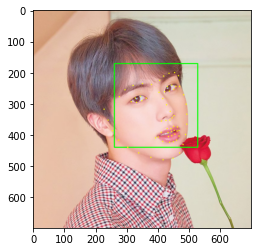

In [17]:
# ÎûúÎìúÎßàÌÅ¨ Ï∂úÎ†•
jin_img = jin_show.copy()
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(jin_show, point, 2, (0, 255, 255), -1)
jin_img = cv2.cvtColor(jin_show, cv2.COLOR_BGR2RGB)
plt.imshow(jin_img)
plt.show()

(268, 268, 3)


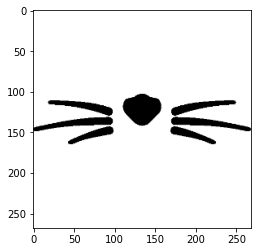

In [18]:
# Í≥†ÏñëÏù¥ ÏàòÏóº Í∞ÄÏ†∏Ïò§Í∏∞ Î∞è Î¶¨ÏÇ¨Ïù¥Ï¶à
sticier_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

print(img_sticker_rgb.shape)
plt.imshow(img_sticker_rgb)

nose x y: 439 324
left-top: 305 190
sticker size: 305 190


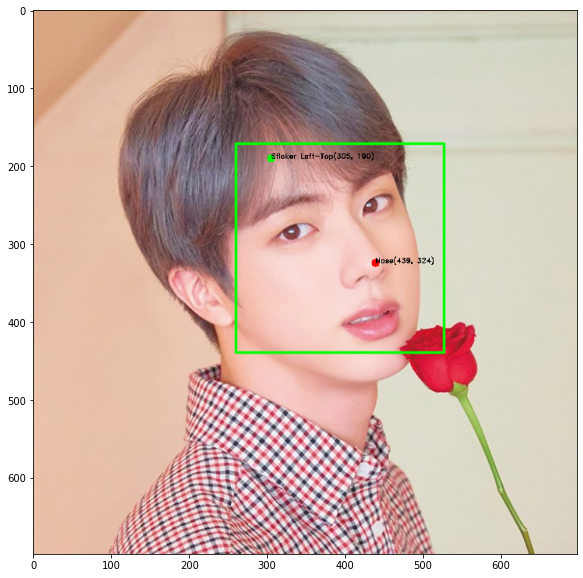

In [19]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ x,y Ï¢åÌëú Ï°∞Ï†ï
# Ïù¥ÎØ∏ÏßÄ ÏãúÏûëÏ†êÏùÄ top_left Ï¢åÌëúÏù¥Í∏∞ ÎïåÎ¨∏
# left
refined_x = x - (w//2)
# top
refined_y = y - (h//2)
# print('(x,y):(%d,%d)'%(refined_x, refined_y))

print('nose x y:', x, y)
print('left-top:', refined_x, refined_y)
print('sticker size:', refined_x, refined_y)

jin_marked_image = jin_show_rgb.copy()
cv2.circle(jin_marked_image, (x, y), 5, (255, 0, 0), -1)
cv2.circle(jin_marked_image, (refined_x, refined_y), 5, (0, 255, 0), -1)
cv2.putText(jin_marked_image, f'Nose{(x, y)}', (x, y), fontScale = 0.3, color = (0,0,0),
            fontFace = cv2.FONT_HERSHEY_DUPLEX)
cv2.putText(jin_marked_image, f'Sticker Left-Top{(refined_x, refined_y)}', (refined_x, refined_y), fontScale = 0.3, color = (0,0,0), fontFace = cv2.FONT_HERSHEY_DUPLEX)

plt.figure(figsize = (10, 10))
plt.imshow(jin_marked_image)
plt.show()

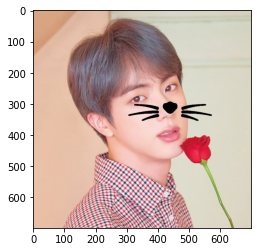

In [20]:
# Ï†ïÌï¥ÏßÑ Ï¢åÌëúÏóê ÏàòÏóº Î∂ôÏù¥Í∏∞
jin_sticker = jin_show.copy()
sticker_area = jin_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
jin_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(jin_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### Ï§ëÍ∞Ñ Ï†êÍ≤Ä
- Ï†ïÎ©¥Ïù¥ ÏïÑÎãå ÏÉÅÌÉúÏóêÏÑúÎèÑ landmarkÍπåÏßÄÎäî Ïûò Ï∂úÎ†•Îê®
- ÌïòÏßÄÎßå, Í≥†ÏñëÏù¥ ÏàòÏóº Ïä§Ìã∞Ïª§Ïùò Í≤ΩÏö∞ ÌöåÏ†ÑÎêú ÏñºÍµ¥Ïùò Í∞ÅÎèÑÏóê ÎßûÍ≤å ÏúÑÏπò Î∞è Í∞ÅÎèÑÏóê Ï°∞Ï†àÏù¥ ÌïÑÏöî

In [23]:
cat_list1 = [(int(w*0.46), int(w*0.4)),
             (int(w*0.54), int(w*0.4)),
             (int(w*0.4), int(w*0.57)),
             (int(w*0.6), int(w*0.57))]

In [24]:
cat_list2 = [((landmark[31][0]+landmark[27][0])//2 - l, (landmark[31][1]+landmark[27][1])//2 - t),
             ((landmark[35][0]+landmark[27][0])//2 - l, (landmark[35][1]+landmark[27][1])//2 - t),
             (landmark[31][0] - l, landmark[31][1] - t),
             (landmark[35][0] - l, landmark[35][1] - t)]

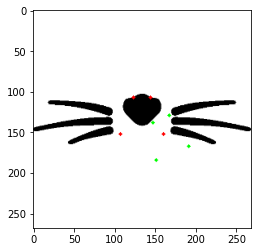

In [25]:
sticker_copy = img_sticker.copy()
for point in cat_list1:
    cv2.circle(sticker_copy, point, 2, (255, 0, 0), -1)
for point in cat_list2:
    cv2.circle(sticker_copy, point, 2, (0, 255, 0), -1)

plt.imshow(sticker_copy)
plt.show()

In [26]:
img_sticker.shape

(268, 268, 3)

### Î©ÄÎ¶¨ÏÑú Ï¥¨ÏòÅÌñàÏùÑ ÎïåÏùò ÏñºÍµ¥/Ïä§Ìã∞Ïª§ Ïù∏Ïãù
- Ïó∞ÏòàÏù∏ Ï∞®ÏùÄÏö∞Ïùò ÏÇ¨ÏßÑ ÌôúÏö©Ìï¥ ÏõêÍ±∞Î¶¨ÏóêÏÑúÏùò ÏñºÍµ¥ Ïù∏Ïãù Ïó¨Î∂Ä ÌôïÏù∏

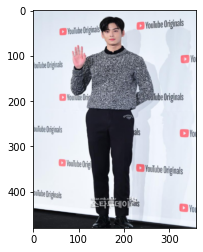

In [2]:
Cha_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/Cha.png'

# OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄ ÏùΩÏñ¥Ïò§Í∏∞
Cha_bgr = cv2.imread(Cha_image_path)
# 640 * 480 ÌÅ¨Í∏∞Î°ú Î¶¨ÏÇ¨Ïù¥Ï¶à
Cha_bgr = cv2.resize(Cha_bgr, (360, 480))
Cha_show = Cha_bgr.copy()
# BGR -> RGB
Cha_rgb = cv2.cvtColor(Cha_bgr, cv2.COLOR_BGR2RGB)
# Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(Cha_rgb)
plt.show()

In [3]:
# HOG(Histogram of Oriented Gradients) - Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏñºÍµ¥ Ï∞æÍ∏∞
import dlib
# detector ÏÑ†Ïñ∏
detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

üå´üõ∏


In [4]:
# detector Ïù¥Ïö©Ìï¥ ÏñºÍµ¥Ïùò bounding box Ï∂îÏ∂ú
#(image, number of image pyramid)
Cha_img_rgb = cv2.cvtColor(Cha_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(Cha_rgb, 1)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(151, 31) (194, 74)]]


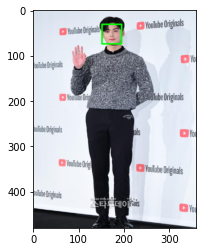

In [5]:
# Ï∞æÏùÄ ÏñºÍµ¥ÏùÑ ÌôîÎ©¥Ïóê Ï∂úÎ†•

# Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(Cha_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)
    
Cha_show_rgb = cv2.cvtColor(Cha_show, cv2.COLOR_BGR2RGB)
plt.imshow(Cha_show_rgb)
plt.show()

In [6]:
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [7]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(Cha_show_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(Cha_show_rgb, point, 2, (0, 255, 255), -1)
        
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y):(%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(x,y):(171,55)
(w,h):(44,44)


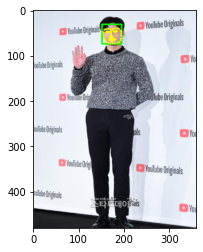

In [8]:
# ÎûúÎìúÎßàÌÅ¨ Ï∂úÎ†•
Cha_show_rgb = Cha_show.copy()

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(Cha_show, point, 2, (0, 255, 255), -1)
Cha_show_rgb = cv2.cvtColor(Cha_show, cv2.COLOR_BGR2RGB)
plt.imshow(Cha_show_rgb)
plt.show()

In [9]:
# Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # ÏΩî ÎÅù ÏßÄÏ†ê index: 
    print(landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y):(%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(171, 55)
(x,y):(171,55)
(w,h):(44,44)


(44, 44, 3)


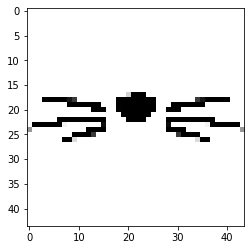

In [10]:
# Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
# Í≥†ÏñëÏù¥ ÏàòÏóº Ïä§Ìã∞Ïª§ Î¶¨ÏÇ¨Ïù¥Ï¶à
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
cha_img_sticker = img_sticker.copy()
cha_img_sticker = cv2.resize(cha_img_sticker, (w,h))

print(cha_img_sticker.shape)
plt.imshow(cha_img_sticker)

nose x y: 171 55
left-top: 149 33
sticker size: 149 33


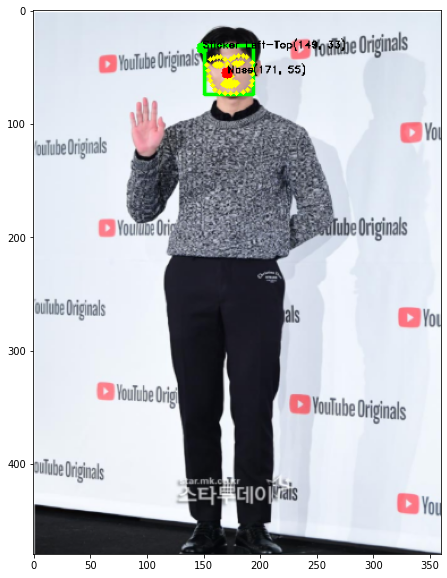

In [11]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ x,y Ï¢åÌëú Ï°∞Ï†ï
# Ïù¥ÎØ∏ÏßÄ ÏãúÏûëÏ†êÏùÄ top_left Ï¢åÌëúÏù¥Í∏∞ ÎïåÎ¨∏
# left
refined_x = x - (w//2)
# top
refined_y = y - (h//2)
# print('(x,y):(%d,%d)'%(refined_x, refined_y))

print('nose x y:', x, y)
print('left-top:', refined_x, refined_y)
print('sticker size:', refined_x, refined_y)

Cha_marked_image = Cha_show_rgb.copy()
cv2.circle(Cha_marked_image, (x, y), 5, (255, 0, 0), -1)
cv2.circle(Cha_marked_image, (refined_x, refined_y), 5, (0, 255, 0), -1)
cv2.putText(Cha_marked_image, f'Nose{(x, y)}', (x, y), fontScale = 0.3, color = (0,0,0),
            fontFace = cv2.FONT_HERSHEY_DUPLEX)
cv2.putText(Cha_marked_image, f'Sticker Left-Top{(refined_x, refined_y)}', (refined_x, refined_y), fontScale = 0.3, color = (0,0,0), fontFace = cv2.FONT_HERSHEY_DUPLEX)

plt.figure(figsize = (10, 10))
plt.imshow(Cha_marked_image)
plt.show()

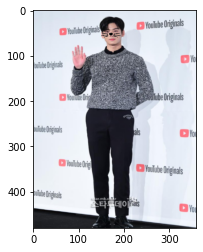

In [12]:
# ÏàòÏ†ï ÏΩîÎìú
sticker_area = Cha_bgr[refined_y:refined_y+cha_img_sticker.shape[0], refined_x:refined_x+cha_img_sticker.shape[1]]
Cha_bgr[refined_y:refined_y+cha_img_sticker.shape[0], refined_x:refined_x+cha_img_sticker.shape[1]] = \
    np.where(cha_img_sticker==255,sticker_area, cha_img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(Cha_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 2Î™Ö Ïù¥ÏÉÅÏùº Îïå Ï†ÅÏö©

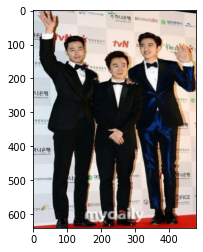

In [59]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/Lee.png'

# OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄ ÏùΩÏñ¥Ïò§Í∏∞
img_bgr = cv2.imread(my_image_path)
# 640 * 480 ÌÅ¨Í∏∞Î°ú Î¶¨ÏÇ¨Ïù¥Ï¶à
img_bgr = cv2.resize(img_bgr, (480, 640))
img_show = img_bgr.copy()
# BGR -> RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(img_rgb)
plt.show()

In [60]:
# HOG(Histogram of Oriented Gradients) - Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏñºÍµ¥ Ï∞æÍ∏∞
import dlib
# detector ÏÑ†Ïñ∏
detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

üå´üõ∏


In [61]:
# detector Ïù¥Ïö©Ìï¥ ÏñºÍµ¥Ïùò bounding box Ï∂îÏ∂ú
#(image, number of image pyramid)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(101, 101) (152, 153)], [(308, 84) (360, 136)], [(227, 147) (279, 199)]]


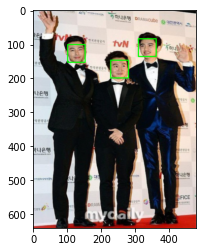

In [62]:
# Ï∞æÏùÄ ÏñºÍµ¥ÏùÑ ÌôîÎ©¥Ïóê Ï∂úÎ†•

# Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [63]:
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [64]:
list_landmarks = []
for dlib_rect in dlib_rects:
    # landmark_predictorÎäî RGB Ïù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÏùÑ ÏûÖÎ†• Î∞õÏïÑ dlib.full_object detection Î∞òÌôò
    points = landmark_predictor(img_rgb, dlib_rect)
    # pointsÎäî dlib.full_object_detectionÏùò Í∞ù„Öä
    # parts() Ìï®ÏàòÎ°ú Í∞úÎ≥Ñ ÏúÑÏπòÏóê Ï†ëÍ∑º
    # ÏßÅÍ¥ÄÏ†ÅÏù∏ (x,y) ÌòïÌÉúÎ°ú Ï†ëÍ∑ºÌï† Ïàò ÏûàÎèÑÎ°ù Î≥ÄÌôò
    # list_landmarkÏóê 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Í∞Ä ÏñºÍµ¥ Í∞úÏàòÎßåÌÅº Ï†ÄÏû•Îê®
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


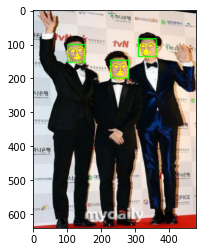

In [65]:
# ÎûúÎìúÎßàÌÅ¨ Ï∂úÎ†•
for landmark in list_landmarks:
    for i in range(len(list_landmarks)):
        for idx, point in enumerate(list_landmarks[i]):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [70]:
# Ïä§Ìã∞Ïª§ ÌÅ¨Í∏∞ Ï°∞Ï†ï
w = dlib_rect.width()
h = dlib_rect.width()

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(53, 53, 3)


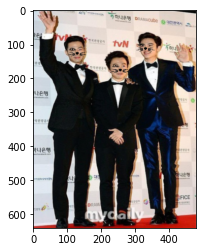

In [71]:
# landmarkÏóêÏÑú Í≤ÄÏ∂úÎêú ÏñºÍµ¥Î≥ÑÎ°ú Ïä§Ìã∞Ïª§ Î∂ôÏù¥Í∏∞
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # left
    x = landmark[30][0]
    refined_x = int(x - w//2)      
    # top
    y = landmark[30][1]
    refined_y = int(y - w//2)      
    # bounding box, landmarkÍ∞Ä ÏóÜÏù¥ Ïä§Ìã∞ÌÅ¨ Î∂ôÏù¥Í∏∞
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### Ïä§Ìã∞Ïª§Ïï± ÎßåÎì§ Îïå Ï†ïÌôïÎèÑÏùò Ï§ëÏöîÏÑ±
- ÌòÑÏû¨ ÏÉÅÏö©ÌôîÎêòÍ≥† ÏûàÎäî SNOW, ULIKE, SODA Îì±Ïùò Ïñ¥Ìîå Îì±ÏùÄ Îã§ÏñëÌïú ÌïÑÌÑ∞ Î∞è ÏñºÍµ¥ Ïä§Ìã∞Ïª§ Í∏∞Îä•, ÏñºÍµ¥ Î≥¥Ï†ï Í∏∞Îä•(Îàà, ÏΩî, ÏûÖ Î∞è ÏñºÍµ¥Ìòï Î≥¥Ï†ï), ÌôîÏû• Í∏∞Îä• Îì±ÏùÑ Î≥¥Ïú†ÌïòÍ≥† ÏûàÏùå
- Ïù¥Îü¨Ìïú Ïï±ÏóêÏÑú Í∞ÄÏû• Ï§ëÏöîÌïú Í≤ÉÏùÄ 'ÏñºÍµ¥ Ïù∏Ïãù'
- Í∞úÏù∏Î≥ÑÎ°ú Îçî ÎÇòÏïÑÍ∞Ä Íµ≠Í∞ÄÎ≥Ñ, Ïù∏Ï¢ÖÎ≥ÑÎ°ú Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏñºÍµ¥ÌòïÎ∂ÄÌÑ∞ ÏãúÏûëÌï¥ Í∞ÅÍ∏∞ Îã§Î•∏ ÌòïÌÉúÏôÄ ÎπÑÏú®Ïùò ÎààÏΩîÏûÖÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏñ¥ Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÌïôÏäµÏùÑ ÌÜµÌï¥ Ï†ïÌôïÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏùå

**Ï¥ùÏ†ïÎ¶¨**
1. ÎßàÏßÄÎßâÏóê Ïä§Ìã∞Ïª§Î•º Î∂ôÏù¥Îäî Í≥ºÏ†ïÏóêÏÑú Í≥ÑÏÜç ÏïÑÎûòÏôÄ Í∞ôÏùÄ Value Error Î∞úÏÉù
- ValueError: operands could not be broadcast together with shapes (44,44,3) (44,0,3) (44,44,3)
- Why? Î¶¨ÏÇ¨Ïù¥Ï¶à Îêú ÌÅ¨Í∏∞Ïùò Ïä§Ìã∞Ïª§ ÏàòÏóºÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥†, ÏõêÎ≥∏ ÌÅ¨Í∏∞Ïùò Ïä§Ìã∞Ïª§ ÏÇ¨ÏßÑÏùÑ Ïù¥Ïö©Ìï¥ shapeÍ∞Ä ÎßûÏßÄ ÏïäÎã§Îäî errorÍ∞Ä ÏßÄÏÜçÏ†ÅÏúºÎ°ú ÏÜçÏ∂ú
- Ìï¥Í≤∞Î∞©Î≤ï? Î≥ÄÏàòÎ™Ö ÏïåÎßûÍ≤å Ï£ºÍ∏∞. ErrorÍ∞Ä Î∞úÏÉùÌñàÏùÑ Îïå ÎãπÌô©ÌïòÏßÄ ÎßêÍ≥† Î≥ÄÏàò ÌïòÎÇòÏî© shape ÌôïÏù∏Ìï¥ÎÇòÍ∞ÄÎ©∞ Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏóêÏÑú Error Î∞úÏÉùÌñàÎäîÏßÄ Ï∞æÏïÑÎÇòÍ∞ÄÍ∏∞

2. Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÌïòÎ©¥ Ï¢ãÏùÑ Î∂ÄÎ∂Ñ
- Í∞ÅÎèÑÏóê Îî∞Îùº ÏñºÍµ¥ ÏàòÏóºÏùÑ Ïñ¥ÎñªÍ≤å ÌöåÏ†ÑÌïòÎäîÏßÄ(Í∞Å, ÏàòÏóº ÌÅ¨Í∏∞ Ï°∞Ï†àÎì±)